# **Medical Insurance - Model Building (Regression)**

In [6]:
# import the relevant libraries for visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import pickle

# import the relevant libraries for pre-processing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# import the relevant libraries for machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

# import the relevant libraries for ML evaluation 
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

# import relevant libraries for hyperparameter optimization
from sklearn.model_selection import GridSearchCV

import os
from google.colab import drive

drive.mount('/content/drive')

# define the file path 
file_path = ['drive', 'My Drive', 'Personal Projects', 'medical_insurance', 'datasets']
data = os.sep.join(file_path + ['Train_Data.csv'])



Mounted at /content/drive


### 1. Import and read the excel workbook.

In [ ]:
# read the excel workbooks
insurance_df = pd.read_csv(data)

In [ ]:
# randomly read some samples
print(insurance_df.sample(5))

            age     sex        bmi smoker     region  children      charges
45    18.000000  female  37.290000     no  southeast         1  2219.445100
1063  38.657389    male  21.873608     no  southwest         2  6686.330056
3508  47.694551    male  32.848352     no  northwest         3  9553.490435
3338  32.311651  female  33.776313     no  northeast         3  6149.614905
1805  48.000000  female  28.880000     no  northwest         1  9249.495200


### 2. Data Exploration

##### 2.1 Investigate the Data Info and basic description statistics

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [ ]:
insurance_df.describe(include = 'all')

,age,sex,bmi,smoker,region,children,charges
count,3630.000000,3630,3630.000000,3630,3630,3630.000000,3630.000000
unique,NaN,2,NaN,2,4,NaN,NaN
top,NaN,male,NaN,no,southeast,NaN,NaN
freq,NaN,2029,NaN,3070,1021,NaN,NaN
mean,38.887036,NaN,30.629652,NaN,NaN,2.503581,12784.808644
std,12.151029,NaN,5.441307,NaN,NaN,1.712568,10746.166743
min,18.000000,NaN,15.960000,NaN,NaN,0.000000,1121.873900
25%,29.000000,NaN,26.694526,NaN,NaN,1.000000,5654.818262
50%,39.170922,NaN,30.200000,NaN,NaN,3.000000,9443.807222
75%,48.343281,NaN,34.100000,NaN,NaN,4.000000,14680.407505


##### 2.2 Histogram 

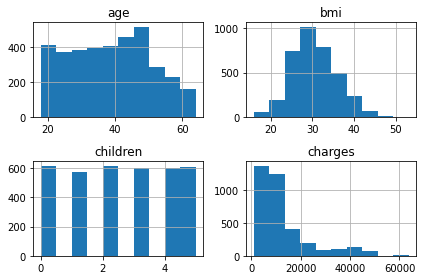

In [ ]:
insurance_df.hist()
plt.tight_layout()
pyplot.show()

##### 2.3 Regression Analysis

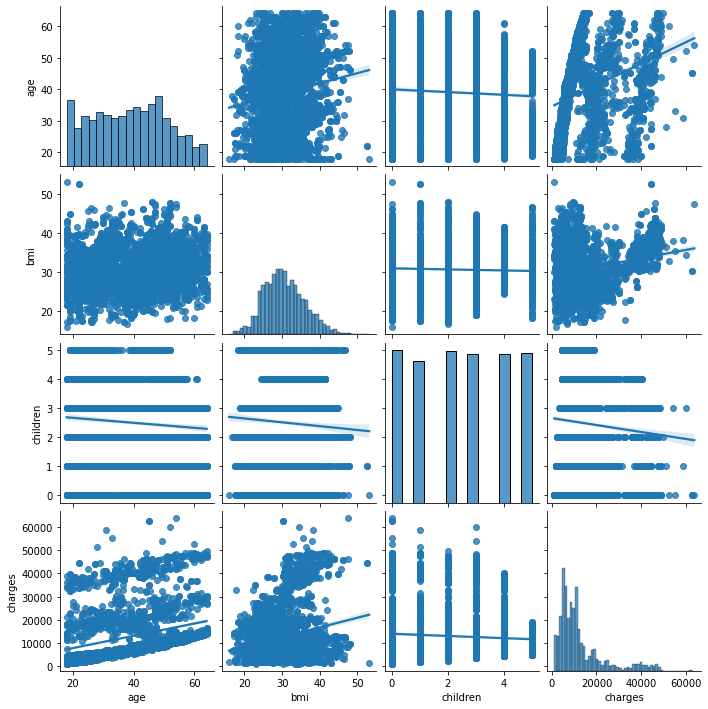

In [ ]:
sns.pairplot(insurance_df, kind = 'reg', palette = 'coolwarm')
plt.show()

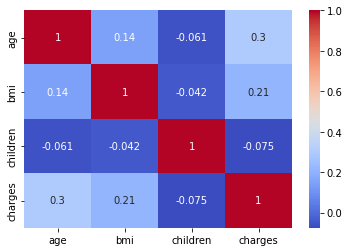

In [ ]:
sns.heatmap(insurance_df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

##### 2.4 Categorical variables distribution 

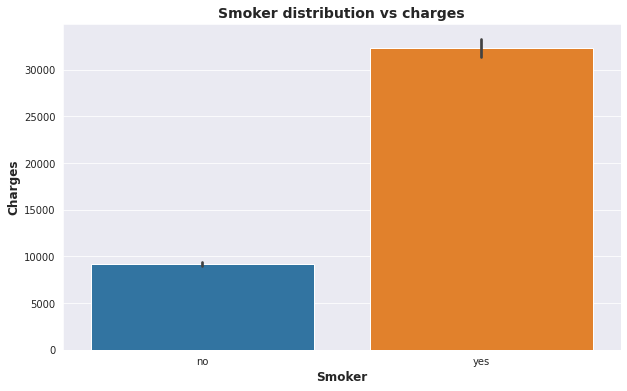

In [ ]:
plt.figure(figsize = (10, 6))
sns.set_style("darkgrid")
sns.barplot(x = 'smoker', y = 'charges', data = insurance_df)
plt.title("Smoker distribution vs charges", fontsize = 14, fontweight = 'bold')
plt.xlabel("Smoker", fontsize = 12, fontweight = 'bold')
plt.ylabel("Charges", fontsize = 12, fontweight = 'bold')
plt.show()

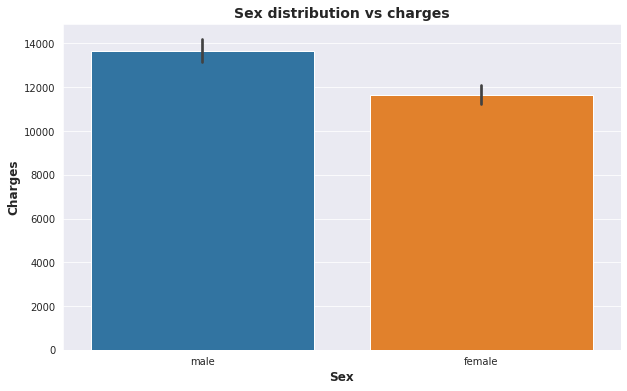

In [ ]:
plt.figure(figsize = (10, 6))
sns.set_style("darkgrid")
sns.barplot(x = 'sex', y = 'charges', data = insurance_df)
plt.title("Sex distribution vs charges", fontsize = 14, fontweight = 'bold')
plt.xlabel("Sex", fontsize = 12, fontweight = 'bold')
plt.ylabel("Charges", fontsize = 12, fontweight = 'bold')
plt.show()

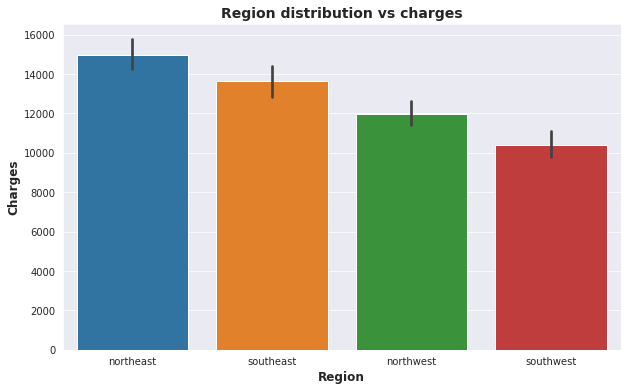

In [ ]:
plt.figure(figsize = (10, 6))
sns.set_style("darkgrid")
sns.barplot(x = 'region', y = 'charges', data = insurance_df)
plt.title("Region distribution vs charges", fontsize = 14, fontweight = 'bold')
plt.xlabel("Region", fontsize = 12, fontweight = 'bold')
plt.ylabel("Charges", fontsize = 12, fontweight = 'bold')
plt.show()

### 3. Data Cleansing and Data Transformation

##### 3.1 Investigate the Missing Data

In [ ]:
# count the number of missing data
missing_count = insurance_df.isnull().sum()
print(missing_count)

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64


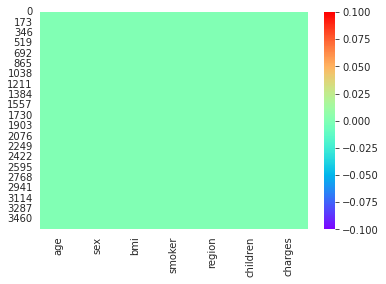

In [ ]:
# using heatmap to visualize the missing data
sns.heatmap(insurance_df.isnull(), annot = False, cmap = 'rainbow')
plt.show()

##### 3.2 Convert the age variable data type from float64 to int64.

In [ ]:
# convert the age data type from float64 to int64 
insurance_df['age'] = insurance_df['age'].astype('int64')

In [ ]:
# re-check the data type for age variable 
insurance_df.info()
print()
print(insurance_df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   int64  
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 198.6+ KB

      age     sex        bmi smoker     region  children       charges
1281   27  female  28.021425     no  southwest         4   5347.093906
2240   22  female  28.299663     no  southeast         4   4768.776915
1739   25  female  32.057821     no  southeast         4   4590.537939
669    21    male  28.421293     no  southwest         5   4960.035379
1382   57  female  38.000000     no  southwest         2  12646.207000


##### 3.3 Convert the bmi and charges variables from 6 decimal places to 2 decimal places.

In [ ]:
# change the decimal points for both bmi and charges variables 
insurance_df[['bmi', 'charges']] = round(insurance_df[['bmi', 'charges']], 2)

In [ ]:
# re-check the decimal points for both bmi and charges variables 
print(insurance_df.sample(5))

      age     sex    bmi smoker     region  children   charges
3404   35    male  34.32     no  southeast         3   5934.38
821    36    male  28.32     no  northeast         3   6758.41
1992   49  female  33.44     no  northwest         4  11232.94
3336   48    male  24.42    yes  southeast         0  21223.68
1132   29  female  25.60     no  southwest         4   5708.87


##### 3.4 Change the categorical values for sex, smoker, and region into numerical values.

In [ ]:
# check the uniqueness for sex, smoker, and region
print(insurance_df['sex'].unique().tolist())
print(insurance_df['smoker'].unique().tolist())
print(insurance_df['region'].unique().tolist())


['male', 'female']
['no', 'yes']
['northeast', 'southeast', 'northwest', 'southwest']


In [ ]:
insurance_columns = ['sex', 'smoker', 'region']

for i in range(len(insurance_columns)):
  # create an object for label encoder
  le = LabelEncoder()
  # transform the categorical values into numerical values for each column 
  insurance_df[insurance_columns[i]] = le.fit_transform(insurance_df[insurance_columns[i]])

In [ ]:
# re-check the conversion of the cat values into num values for sex, smoker, region 
print(insurance_df.sample(5))

      age  sex    bmi  smoker  region  children   charges
62     63    1  31.44       0       0         0  13974.46
1378   28    0  25.80       0       3         0   3161.45
3325   37    1  29.79       0       3         4   7620.84
744    48    0  37.90       0       1         4  10823.68
1104   56    0  28.60       0       0         0  11658.12


##### 3.5 Standardized the features columns. 

In [ ]:
# define the feature columns names in the training set
insurance_columns = insurance_df.drop(columns = ['charges'], axis = 1).columns
print(insurance_columns)

# create an object for standardscaler
scaler = StandardScaler()
# standardized the feature columns in the training set
insurance_df[insurance_columns] = scaler.fit_transform(insurance_df[insurance_columns])

# save the standardscaler object
file_path2 = ['drive', 'My Drive', 'Personal Projects', 'medical_insurance']
filename = os.sep.join(file_path2 + ['/standardscaler.sav'])
pickle.dump(scaler, open(filename, 'wb'))

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children'], dtype='object')


In [ ]:
# re-check for the standardization of the feature columns in the training set
print(insurance_df.sample(5))

           age       sex       bmi    smoker    region  children   charges
3608 -0.955879  0.888290 -1.064188 -0.427095  1.363106  1.457906   5550.92
604  -0.298136 -1.125759 -0.828915 -0.427095 -1.392458 -1.462089   5227.99
1187  1.675093 -1.125759 -0.707602 -0.427095  0.444584  0.289908  14349.89
3086  0.606261  0.888290 -0.374911 -0.427095  1.363106  0.873907  10090.13
1573  0.688479 -1.125759 -0.514605  2.341398  0.444584 -1.462089  23065.42


### 4. Train-Test Split 

In [ ]:
# extract the respective attributes and target
x_features = insurance_df.drop(columns = ['charges'])
y_target = insurance_df['charges']

# split the dataset into 80%% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(x_features,
                                                    y_target,
                                                    test_size = 0.20,
                                                    random_state = 42,
                                                    shuffle = False)

### 5. Model Building & Evaluation (Baseline)

In [ ]:
# create a function to compute r2 score
def compute_r2_score(y_true, y_pred):
  r2Score = r2_score(y_true, y_pred)
  return r2Score

# create a function to compute MSE 
def compute_mse(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  return mse

# define the baseline models and name
baseline_models = [Ridge(random_state = 42), 
                   Lasso(random_state = 42), 
                   LinearRegression(), 
                   DecisionTreeRegressor(random_state = 42), 
                   RandomForestRegressor(random_state = 42), 
                   GradientBoostingRegressor(random_state = 42), 
                   ExtraTreesRegressor(random_state = 42), 
                   KNeighborsRegressor(n_neighbors = 5)]
model_names = ['ridge', 'lasso', 'MLR', 'decision tree', 'random forest', 'gradient boosting', 'extra trees', 'knn']

# initialize an empty list for r2score and rmse 
r2_score_list_train = list()
r2_score_list_test = list()
rmse_list_train = list()
rmse_list_test = list()

# build and evaluate the respective regressions models 
for i in range(len(baseline_models)):
  model_ = baseline_models[i]
  model_.fit(X_train, y_train)

  # predict the y-values for training and testing sets
  y_pred_train = model_.predict(X_train)
  y_pred_test = model_.predict(X_test)

  # call the function to compute the r2 score for both training and testing sets
  r2_score_train = compute_r2_score(y_train, y_pred_train)
  r2_score_test = compute_r2_score(y_test, y_pred_test)

  # call the function to compute the mse for both training and testing sets
  mse_score_train = compute_mse(y_train, y_pred_train)
  mse_score_test = compute_mse(y_test, y_pred_test)

  # display the evaluation for training set
  print("The training r2-score for {} regressor is {:.4f}".format(model_names[i], r2_score_train))
  print("The training RMSE for {} regressor is {:.4f}".format(model_names[i], np.sqrt(mse_score_train)))

  # display the evaluation for testing set
  print("The testing r2-score for {} regressor is {:.4f}".format(model_names[i], r2_score_test))
  print("The testing RMSE for {} regressor is {:.4f}".format(model_names[i], np.sqrt(mse_score_test)))

  # append the r2 scores and rmse into the respective lists 
  r2_score_list_train.append(r2_score_train)
  r2_score_list_test.append(r2_score_test)
  rmse_list_train.append(np.sqrt(mse_score_train))
  rmse_list_test.append(np.sqrt(mse_score_test))

  print()

The training r2-score for ridge regressor is 0.7130
The training RMSE for ridge regressor is 5737.1926
The testing r2-score for ridge regressor is 0.7304
The testing RMSE for ridge regressor is 5653.2421

The training r2-score for lasso regressor is 0.7130
The training RMSE for lasso regressor is 5737.1923
The testing r2-score for lasso regressor is 0.7304
The testing RMSE for lasso regressor is 5653.2140

The training r2-score for MLR regressor is 0.7130
The training RMSE for MLR regressor is 5737.1918
The testing r2-score for MLR regressor is 0.7305
The testing RMSE for MLR regressor is 5652.9898

The training r2-score for decision tree regressor is 0.9992
The training RMSE for decision tree regressor is 310.6326
The testing r2-score for decision tree regressor is 0.9576
The testing RMSE for decision tree regressor is 2242.3554

The training r2-score for random forest regressor is 0.9819
The training RMSE for random forest regressor is 1441.3737
The testing r2-score for random forest

In [ ]:
# create a dataframe
evaluation_df = pd.DataFrame(list(zip(r2_score_list_train, r2_score_list_test, rmse_list_train, rmse_list_test)), index = model_names, columns = ['r2_score_train', 
                                                                                                                                                  'r2_score_test',
                                                                                                                                                  'rmse_train',
                                                                                                                                                  'rmse_test'])
evaluation_df

,r2_score_train,r2_score_test,rmse_train,rmse_test
ridge,0.712955,0.730444,5737.192642,5653.242101
lasso,0.712955,0.730446,5737.192330,5653.213965
MLR,0.712955,0.730468,5737.191800,5652.989759
decision tree,0.999159,0.957590,310.632624,2242.355366
random forest,0.981882,0.959200,1441.373671,2199.388449
gradient boosting,0.882084,0.879927,3677.154174,3773.072606
extra trees,0.999159,0.971026,310.632624,1853.431008
knn,0.904661,0.907861,3306.439385,3305.166157


In [ ]:
evaluation_df.iloc[0,1]

0.730443500906075

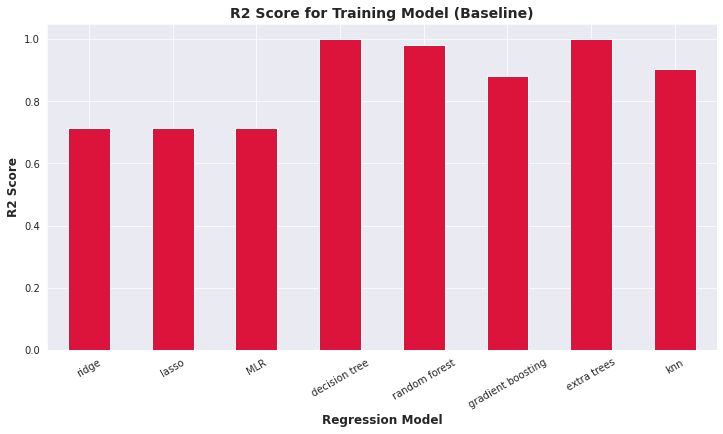

In [ ]:
# create a bar plot to illustrate the R2 score for respective training regression models
plt.figure(figsize = (12, 6))
sns.set_style("darkgrid")
evaluation_df['r2_score_train'].plot(kind = 'bar', color = 'crimson')
plt.title("R2 Score for Training Model (Baseline)", fontsize = 14, fontweight = 'bold')
plt.xlabel('Regression Model', fontsize = 12, fontweight = 'bold')
plt.ylabel('R2 Score', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 30, horizontalalignment = 'center')
plt.show()


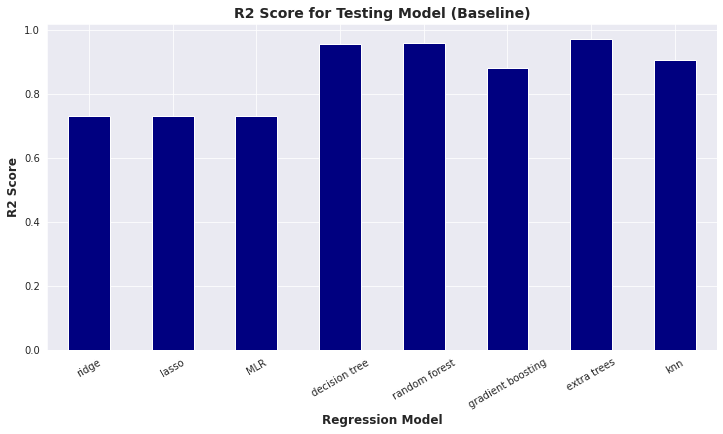

In [ ]:
# create a bar plot to illustrate the R2 score for respective testing regression models
plt.figure(figsize = (12, 6))
sns.set_style("darkgrid")
evaluation_df['r2_score_test'].plot(kind = 'bar', color = 'navy')
plt.title("R2 Score for Testing Model (Baseline)", fontsize = 14, fontweight = 'bold')
plt.xlabel('Regression Model', fontsize = 12, fontweight = 'bold')
plt.ylabel('R2 Score', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 30, horizontalalignment = 'center')
plt.show()


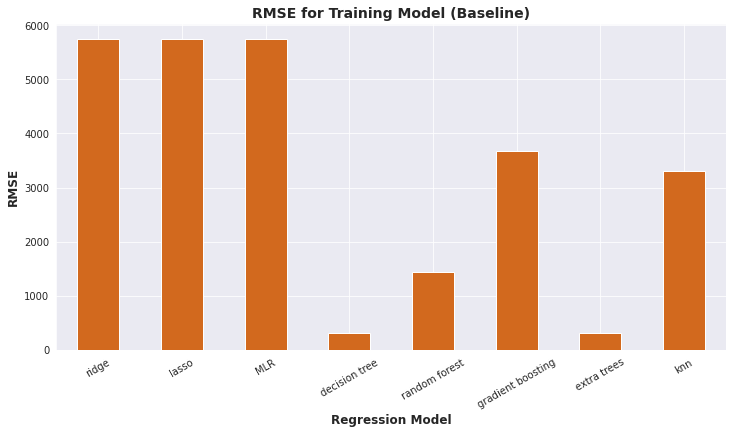

In [ ]:
# create a bar plot to illustrate the RMSE for respective training regression models
plt.figure(figsize = (12, 6))
sns.set_style("darkgrid")
evaluation_df['rmse_train'].plot(kind = 'bar', color = 'chocolate')
plt.title("RMSE for Training Model (Baseline)", fontsize = 14, fontweight = 'bold')
plt.xlabel('Regression Model', fontsize = 12, fontweight = 'bold')
plt.ylabel('RMSE', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 30, horizontalalignment = 'center')
plt.show()


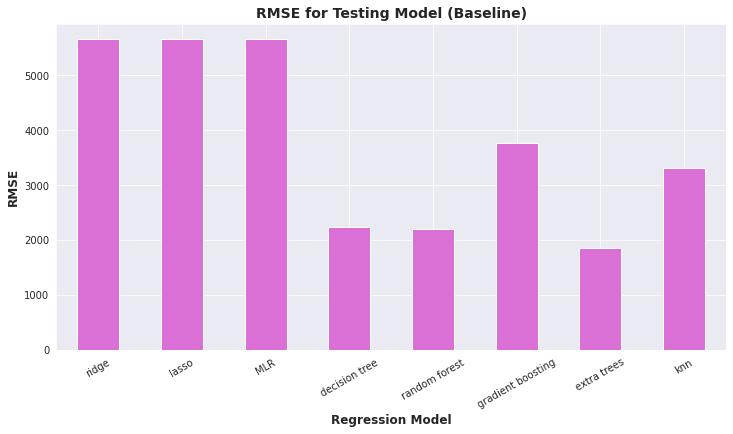

In [ ]:
# create a bar plot to illustrate the RMSE for respective testing regression models
plt.figure(figsize = (12, 6))
sns.set_style("darkgrid")
evaluation_df['rmse_test'].plot(kind = 'bar', color = 'orchid')
plt.title("RMSE for Testing Model (Baseline)", fontsize = 14, fontweight = 'bold')
plt.xlabel('Regression Model', fontsize = 12, fontweight = 'bold')
plt.ylabel('RMSE', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 30, horizontalalignment = 'center')
plt.show()


### 6. Hyperparameter Tuning for Random Forest Regressor 

In [ ]:
# define the parameters grid
param_grid = {'max_depth': np.arange(10, 20),
              'n_estimators': np.arange(80, 210, 5),
              'min_samples_split': np.arange(2, 4),
              'min_samples_leaf': np.arange(2, 4)
              }

# use grid-search CV to find the best above-defined parameters
score = make_scorer(mean_squared_error)
grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state = 42),
                           param_grid = param_grid,
                           cv = 5,
                           n_jobs = 1,
                           verbose = 3,
                           scoring = score,
                           error_score = 'raise',
                           return_train_score = True)
grid_search.fit(X_train, y_train) 



Streaming output truncated to the last 5000 lines.
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=150;, score=(train=5832903.178, test=12524048.730) total time=   0.6s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=150;, score=(train=5583786.633, test=14017566.253) total time=   0.6s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=150;, score=(train=5546915.394, test=15978222.501) total time=   0.6s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=150;, score=(train=5505382.699, test=14051353.525) total time=   0.6s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=150;, score=(train=5532454.471, test=13920289.420) total time=   0.6s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=155;, score=(train=5827946.745, test=12521124.067) total time=   0.6s
[CV 2/5] END max_depth=10, min_samples_leaf

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3]),
                         'n_estimators': array([ 80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140,
       145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205])},
             return_train_score=True, scoring=make_scorer(mean_squared_error),
             verbose=3)

In [ ]:
# find the best parameters
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [ ]:
grid_search.best_score_

14238185.609245008

### 7. Rebuilding Random Forest Regressor based on Hyperparameter Tuning

In [ ]:
# rebuild the random forest regressor using the best hyperparameters
rfr_remodel = RandomForestRegressor(random_state = 42,
                                    max_depth = 15,
                                    min_samples_leaf = 2,
                                    min_samples_split = 2,
                                    n_estimators = 80)
rfr_remodel.fit(X_train, y_train)



RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=80,
                      random_state=42)

### 8. Evaluate the Random Forest Regressor with Hyperparameter Tuning

In [ ]:
y_pred_rfr_train_remodel = rfr_remodel.predict(X_train)
y_pred_rfr_test_remodel = rfr_remodel.predict(X_test)

r2_score_rfr_train_remodel = r2_score(y_train, y_pred_rfr_train_remodel)
r2_score_rfr_test_remodel = r2_score(y_test, y_pred_rfr_test_remodel)
print(r2_score_rfr_train_remodel)
print(r2_score_rfr_test_remodel)

rmse_rfr_train_remodel = np.sqrt(mean_squared_error(y_train, y_pred_rfr_train_remodel))
rmse_rfr_test_remodel = np.sqrt(mean_squared_error(y_test, y_pred_rfr_test_remodel))
print(rmse_rfr_train_remodel)
print(rmse_rfr_test_remodel)

0.9583080368422435
0.945268047337297
2186.506690274996
2547.376583705452


### 9. Save the Random Forest Regressor Model

In [ ]:
file_path2 = ['drive', 'My Drive', 'Personal Projects', 'medical_insurance']
filename = os.sep.join(file_path2 + ['/insurance_model.sav'])
pickle.dump(rfr_remodel, open(filename, 'wb'))

In [7]:
# load the model from the disk 
import pickle
import os
file_path2 = ['drive', 'My Drive', 'Personal Projects', 'medical_insurance']
filename = os.sep.join(file_path2 + ['/insurance_model.sav'])
loaded_model = pickle.load(open(filename, "rb"))
pred = loaded_model.predict(X_train)
result = r2_score(y_train, pred)
print(result)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


NameError: ignored